In [1]:
import yfinance
import numpy as np
import pandas as pd
import pandas
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

import cufflinks as cf
cf.set_config_file(offline=True)

import warnings
warnings.filterwarnings("ignore")


In [2]:
from ActMng import AccountManager

In [3]:
starting_capital = 100000
allocation = 0.8

symbol = 'SPY'

long_trend_days = 12
short_trend_days = 6

In [4]:
def fetch_data(symbol:str='SPY', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
df = fetch_data(symbol)

[*********************100%***********************]  1 of 1 completed


In [5]:
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].iplot()

In [6]:
df['trade_direction'] = np.sign(fast_trend-slow_trend)
df

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2019-12-31,320.529999,321.859985,NaN,NaN,NaN
2020-01-02,323.540009,324.869995,NaN,NaN,NaN
2020-01-03,321.160004,322.410004,NaN,NaN,NaN
2020-01-06,320.489990,323.640015,NaN,NaN,NaN
2020-01-07,323.019989,322.730011,NaN,NaN,NaN
2020-01-08,322.940002,324.450012,321.946665,NaN,NaN
2020-01-09,326.160004,326.649994,322.885000,NaN,NaN
2020-01-10,327.290009,325.709991,323.510000,NaN,NaN
2020-01-13,326.390015,327.950012,324.381668,NaN,NaN


In [8]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']


In [9]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-16,329.700012,330.920013,327.393341,324.670003,1.0,Long
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,None
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None
2020-01-24,332.440002,328.769989,331.268336,328.767504,1.0,None
2020-01-27,323.029999,323.500000,330.156667,328.775004,1.0,None
2020-01-28,325.059998,326.890015,329.049998,328.683337,1.0,None
2020-01-29,328.380005,326.619995,328.630000,328.774170,-1.0,Short


In [12]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(symbol=symbol,trades_df=df,starting_capital=starting_capital,allocation_amount=allocation)
results = trading_strategy.run()

In [11]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-01-16,329.700012,330.920013,327.393341,324.670003,1.0,Long,100295.021096,20000.589038,242.64,242.64,1.0
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,None,100544.940000,20000.589038,242.64,0.00,0.0
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None,100387.218076,20000.589038,242.64,0.00,0.0
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None,100396.925750,20000.589038,242.64,0.00,0.0
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None,100489.130134,20000.589038,242.64,0.00,0.0
2020-01-24,332.440002,328.769989,331.268336,328.767504,1.0,None,99773.339172,20000.589038,242.64,0.00,0.0
2020-01-27,323.029999,323.500000,330.156667,328.775004,1.0,None,98494.629038,20000.589038,242.64,0.00,0.0
2020-01-28,325.059998,326.890015,329.049998,328.683337,1.0,None,99317.182192,20000.589038,242.64,0.00,0.0
2020-01-29,328.380005,326.619995,328.630000,328.774170,-1.0,Short,100104.114194,179420.513809,-242.84,-485.48,2.0
2020-01-30,324.359985,327.679993,327.316666,328.605001,-1.0,None,99846.704387,179420.513809,-242.84,0.00,0.0


In [13]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-01-16,SPY,2020-01-16 00:00:00,At Market Open,BUY,MARKET,329.700012,242.64,1.0
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,242.64,1.0
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,242.84,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,242.84,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,237.00,1.0
2020-02-25,SPY,2020-02-25 00:00:00,At Market Open,SELL,MARKET,323.940002,237.00,1.0
2020-02-25,SPY,2020-02-25 00:00:00,At Market Open,SELL,MARKET,323.940002,238.29,1.0
2020-03-31,SPY,2020-03-31 00:00:00,At Market Open,BUY,MARKET,260.559998,238.29,1.0
2020-03-31,SPY,2020-03-31 00:00:00,At Market Open,BUY,MARKET,260.559998,342.62,1.0
2020-05-08,SPY,2020-05-08 00:00:00,At Market Open,SELL,MARKET,291.089996,342.62,1.0


In [14]:
#Todo:
r_df = results['result_df']

# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf = ((r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df)))-1
#or
CAGR_tf = ((r_df['account_val'].iloc[-1]/starting_capital)**(365/(df.index[-1] - df.index[0]).days))-1


# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = (r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std())*((252) **0.5)

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.iplot()
#or
r_df.account_val.plot()

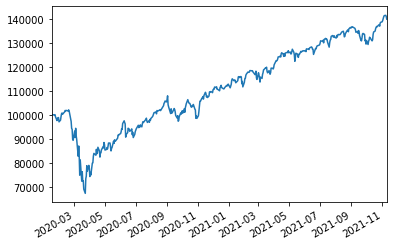

In [15]:
#Todo:
# Calculate the Absolute Return of a buy-and-hold strategy in the same period
absolute_return_bh = (r_df.Close.iloc[-1]-r_df.Open.iloc[0])/r_df.Open.iloc[0]
# Calculate the CAGR or a buy-and-hold trading strategy
CAGR_bh = ((r_df.Close.iloc[-1]/r_df.Open.iloc[0])**(252/len(df)))-1
#or
CAGR_bh = ((r_df.Close.iloc[-1]/r_df.Open.iloc[0])**(365/(df.index[-1] - df.index[0]).days))-1

# Calculate the IR (Sharpe without RF-rate) of a buy-and-hold trading strategy
information_ratio_bh = (r_df.Close.pct_change().mean()/r_df.Close.pct_change().std())*((252) **0.5)

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).iplot()
#or
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).plot()